## Exploring Tf-IDF

In this notebook you will be exploring the computation of the Tf-IDF feature using a very popular dataset called 20 newsgroups.

The resources you should use to complete this notebook are:
1.  https://en.wikipedia.org/wiki/Tf%E2%80%93idf
2.  http://www.tfidf.com/

the 20 newsgroups by date dataset
Number of posts 11314


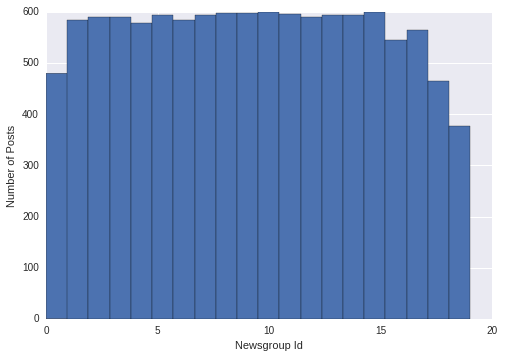

First post!
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [1]:
%matplotlib inline
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

post_texts = data.data
news_group_ids = data.target

print data.description

print "Number of posts", len(data.data)
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(data.target, bins=20)
plt.xlabel('Newsgroup Id')
plt.ylabel('Number of Posts')
plt.show()

print "First post!"
print data.data[0]

Next, you will be writing a function to compute the term frequency part of [Tf-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).  It's up to you how fancy to make this function.  In my simple version, I used split after first removing leading or trailing punctuation (I used the `strip` function) and also converting the words to lower case.

In [17]:
import re

def tf(text):
    """ Returns a dictionary where keys are words that occur in text
        and the value is the number of times that each word occurs. """
    s = text.lower()
    punctuation = "[?.,!/ \"\'()]"
    words = s.split()
    text_words = dict( (re.sub(punctuation, '', word), words.count(word)) for word in words )
    return text_words

tf(data.data[0])

{u'2-door': 1,
 u'60s': 1,
 u'70s': 1,
 u'a': 3,
 u'addition': 1,
 u'all': 1,
 u'anyone': 2,
 u'be': 1,
 u'body': 1,
 u'bricklin': 1,
 u'bumper': 1,
 u'called': 1,
 u'can': 1,
 u'car': 2,
 u'could': 1,
 u'day': 1,
 u'doors': 1,
 u'e-mail': 1,
 u'early': 1,
 u'engine': 1,
 u'enlighten': 1,
 u'from': 2,
 u'front': 1,
 u'funky': 1,
 u'have': 1,
 u'history': 1,
 u'i': 3,
 u'if': 2,
 u'in': 1,
 u'info': 1,
 u'is': 2,
 u'it': 2,
 u'know': 1,
 u'late': 1,
 u'looked': 1,
 u'looking': 1,
 u'made': 1,
 u'me': 1,
 u'model': 1,
 u'name': 1,
 u'of': 2,
 u'on': 2,
 u'or': 1,
 u'other': 1,
 u'out': 1,
 u'please': 1,
 u'production': 1,
 u'really': 1,
 u'rest': 1,
 u'saw': 1,
 u'separate': 1,
 u'small': 1,
 u'specs': 1,
 u'sports': 1,
 u'tellme': 1,
 u'the': 6,
 u'there': 1,
 u'this': 4,
 u'to': 1,
 u'was': 4,
 u'were': 1,
 u'whatever': 1,
 u'where': 1,
 u'wondering': 1,
 u'years': 1,
 u'you': 1}

Next, you will be writing a function to compute the inverse document frequency part of [Tf-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

In [18]:
from math import log
import operator

def idf(data):
    """ Returns a dictionary where the keys are words and the values are inverse
        document frequencies.  For this function you should use the formula
        idf(w, data) = log(N / |text in data that contain the word w|) """
    term_freqs = [ tf(text) for text in data ]
    total_doc_number = len(term_freqs)
    doc_freqs = {}
    inv_doc_freqs = {}
    for words in term_freqs:
        for word in words:
            if word in doc_freqs:
                doc_freqs[word] += 1.0
            else:
                doc_freqs[word] = 1.0
    for word in doc_freqs:
        inv_doc_freqs[word] = total_doc_number / doc_freqs[word]
    return inv_doc_freqs

idf = idf(data.data)
sorted_idf = sorted(idf.items(), key=operator.itemgetter(1))

print "Lowest IDF (most common)"
for d in sorted_idf[0:10]:
    print d

print ""
print "Highest IDF (least common)"
rev_sorted_idf = sorted(idf.items(), key=operator.itemgetter(1))
for d in reversed(rev_sorted_idf[-10:]):
    print d

Lowest IDF (most common)
(u'the', 1.1952250158461863)
(u'to', 1.3433863690334837)
(u'a', 1.36247591522158)
(u'and', 1.4613794885042624)
(u'of', 1.4764452564269868)
(u'i', 1.5676874047388112)
(u'in', 1.6014154281670205)
(u'is', 1.620220535586424)
(u'that', 1.7522069072324609)
(u'it', 1.794164287979702)

Highest IDF (least common)
(u'jawbone', 11314.0)
(u'false-alarms', 11314.0)
(u'ipns', 11314.0)
(u'btselem', 11314.0)
(u'codings', 11314.0)
(u'palestine;', 11314.0)
(u'echte', 11314.0)
(u'spirit-offspring', 11314.0)
(u'wreckmudder-disciples', 11314.0)
(u'135mm', 11314.0)


The last step in Tf-IDF is to compute the product of tf and IDF for each document, and then convert the resultant dictionary of Tf-IDF features into a vector.  We'll be discussing this next class.

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.